In [1]:
import numpy as np
import pandas as pd

In [2]:
movie = pd.read_csv('movie_metadata.csv')
print(movie.shape)
movie.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
movie.columns.tolist()

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [4]:
genres = movie[['movie_title', 'genres']]
genres.head()

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary


In [5]:
# Simple columns iteration
for i in genres:  # .columns()
    print(i)

movie_title
genres


In [6]:
# Iterate values
for i in genres.values[:5]:
    print(i)

['Avatar\xa0' 'Action|Adventure|Fantasy|Sci-Fi']
["Pirates of the Caribbean: At World's End\xa0" 'Action|Adventure|Fantasy']
['Spectre\xa0' 'Action|Adventure|Thriller']
['The Dark Knight Rises\xa0' 'Action|Thriller']
['Star Wars: Episode VII - The Force Awakens\xa0            '
 'Documentary']


In [7]:
# Another varient of iteration

# for film in genres.iterrows():
#     print(film)

In [8]:
budget = movie[['budget', 'duration']]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [9]:
# Apply function
budget.applymap(func=lambda x: x + 1).head()

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN


In [10]:
# Apply method
budget.apply(func=np.mean, axis=0)

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [11]:
budget.apply(func=lambda x: x + 10, axis=1).head()

,budget,duration
0,237000010.0,188.0
1,300000010.0,179.0
2,245000010.0,158.0
3,250000010.0,174.0
4,NaN,NaN


In [12]:
# Method transform
budget.transform(func=lambda x: x + 10, axis=1).head()

,budget,duration
0,237000010.0,188.0
1,300000010.0,179.0
2,245000010.0,158.0
3,250000010.0,174.0
4,NaN,NaN


In [13]:
def mm(col):
    return np.mean(col) * 100

budget.apply(func=mm, axis=0)

budget      3.975262e+09
duration    1.072011e+04
dtype: float64

# Time Series intro

In [14]:
import numpy as np
import pandas as pd

In [15]:
# Set time series data
stock = pd.read_csv(
    filepath_or_buffer="amzn_stock.csv",
    index_col='Date',
    parse_dates=True
)

stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [16]:
# Display index
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [17]:
# Display data from February till March
stock['2010-02': '2011-03']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
...,...,...,...,...,...
2011-03-25,171.64,173.49,170.30,170.98,4294302
2011-03-28,171.80,172.50,169.25,169.35,3400936
2011-03-29,170.73,174.84,170.07,174.62,4887443


In [18]:
# Split each day into 2h parts
stock.resample('2h').asfreq()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 16:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 18:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 20:00:00,NaN,NaN,NaN,NaN,NaN


In [19]:
# Display each week
stock.resample('1w').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


In [20]:
# Took data from 3 prev cells for each cell
stock.rolling(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


# [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)

In [21]:
# Without nan
stock.rolling(window=3, min_periods=1).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [22]:
stock.expanding(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


# [pandas.DataFrame.expanding](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html)
# [pandas.DataFrame.ewm](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html)

In [23]:
stock.ewm(alpha=0.7).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


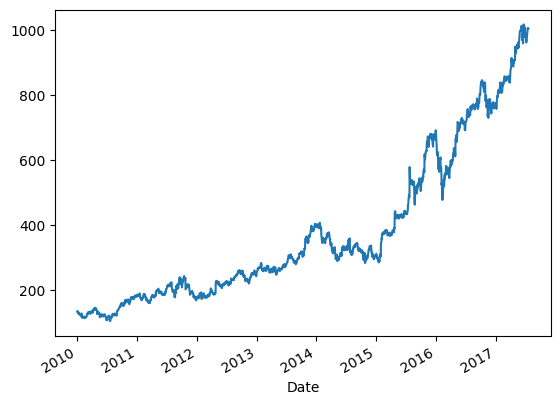

In [24]:
stock['Open'].plot();

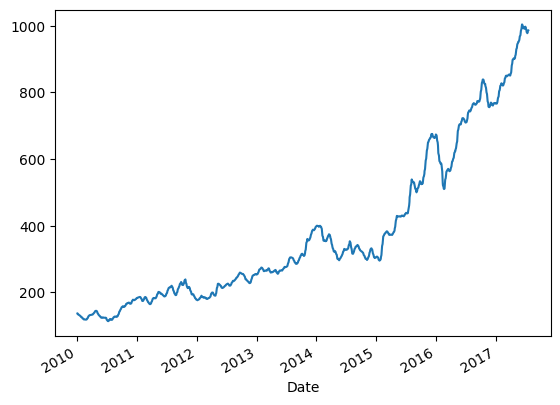

In [25]:
# Let's smooth the graph of the function
ns = stock.Open.rolling(10, min_periods=1).mean()
ns.plot();

### There are less angles than in first

In [26]:
stock.index.weekday

Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       ...
       0, 2, 3, 4, 0, 1, 2, 3, 4, 0],
      dtype='int32', name='Date', length=1896)